pandas 라이브러리 호출

In [2]:
import pandas as pd     # pandas 라이브러리를 pd 이름으로 호출

# Series

In [3]:
prices = [1000, 1010, 1020]     # 주가를 담아놓은 리스트 생성

In [4]:
dates = pd.date_range('2023-12-01', periods=3)     # date_range 함수를 이용해 날짜 생성
dates

DatetimeIndex(['2023-12-01', '2023-12-02', '2023-12-03'], dtype='datetime64[ns]', freq='D')

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html

In [5]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize: 'bool' = False, name: 'Hashable' = None, closed: "Literal['left', 'right'] | None | lib.NoDefault" = <no_default>, inclusive: 'IntervalClosedType | None' = None, **kwargs) -> 'DatetimeIndex'
    Return a fixed frequency DatetimeIndex.
    
    Returns the range of equally spaced time points (where the difference between any
    two adjacent points is specified by the given frequency) such that they all
    satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
    the first and last time points in that range that fall on the boundary of ``freq``
    (if given as a frequency string) or that are valid for ``freq`` (if given as a
    :class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
    ``end``, or ``freq`` is *not* specified, this missing parameter can be computed
    given ``periods``, the 

In [6]:
# 12월1일부터 31일까지의 매주 금요일
pd.date_range('2023-12-01', '2023-12-31', freq='W-FRI')

DatetimeIndex(['2023-12-01', '2023-12-08', '2023-12-15', '2023-12-22',
               '2023-12-29'],
              dtype='datetime64[ns]', freq='W-FRI')

https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases

In [7]:
# 주가를 데이터로, 날짜를 인덱스로 하는 Series 생성
s = pd.Series(prices, index=dates)     # pd.Series(데이터)
s

2023-12-01    1000
2023-12-02    1010
2023-12-03    1020
Freq: D, dtype: int64

In [8]:
s2 = pd.Series(prices)     # 인덱스를 지정하지 않은 Series
s2

0    1000
1    1010
2    1020
dtype: int64

In [9]:
s2[3] = 1030     # Series에 데이터 추가
s2

0    1000
1    1010
2    1020
3    1030
dtype: int64

In [10]:
s[pd.to_datetime('2023-12-04')] = 1030     # 인덱스를 이용한 데이터 추가
s

2023-12-01    1000
2023-12-02    1010
2023-12-03    1020
2023-12-04    1030
Freq: D, dtype: int64

Series 데이터 조회

In [11]:
s[2]     # 배열 스타일로 데이터 추출

1020

In [12]:
s['2023-12-03']     # 인덱스를 이용한 데이터 추출

1020

# DataFrame

In [13]:
# 딕셔너리로부터 DataFrame 만들기
prices = {'A전자' : [1000, 1010, 1020],
          'B화학' : [2000, 2010, 2020],
          'C금융' : [3000, 3010, 3020]}
df1 = pd.DataFrame(prices)     # pd.DataFrame(데이터)
df1

,A전자,B화학,C금융
0,1000,2000,3000
1,1010,2010,3010
2,1020,2020,3020


In [14]:
df2 = pd.DataFrame(prices, index=dates)     # 인덱스가 있는 DataFrame
df2

,A전자,B화학,C금융
2023-12-01,1000,2000,3000
2023-12-02,1010,2010,3010
2023-12-03,1020,2020,3020


데이터 선택 - 인덱스 번호 이용

In [15]:
df2.iloc[0]     # 행 선택 - [0행, 생략]

A전자    1000
B화학    2000
C금융    3000
Name: 2023-12-01 00:00:00, dtype: int64

In [16]:
df2.iloc[:, 0]     # 열 선택 - [전체 행, 0열]

2023-12-01    1000
2023-12-02    1010
2023-12-03    1020
Freq: D, Name: A전자, dtype: int64

In [17]:
df2.iloc[0, 0]     # 행, 열 지정 - [0행, 0열]

1000

데이터 선택 - 레이블 이용

In [18]:
df2.loc['2023-12-01']   # ['2018-12-01'행, 생략]

A전자    1000
B화학    2000
C금융    3000
Name: 2023-12-01 00:00:00, dtype: int64

In [19]:
df2.loc[:, 'A전자']   # [모든 행, 'A전자'열]

2023-12-01    1000
2023-12-02    1010
2023-12-03    1020
Freq: D, Name: A전자, dtype: int64

In [20]:
df2.loc['2023-12-01', 'A전자']   # ['2018-12-01'행, 'A전자'열]

1000

In [ ]:
df2['A전자']     # 열 선택

In [ ]:
df2.A전자     # df2['A전자']  와 동일

In [ ]:
df2['A전자']['2023-12-01']   # df2['A전자']의 ['2018-12-01']행 선택

In [ ]:
df2.loc[:, 'A전자']['2023-12-01']

데이터 추가

In [21]:
# DataFrame에 열 추가
df2['D엔터'] = [4000, 5000, 6000]     # 데이터프레임[열이름] = [데이터]
df2

,A전자,B화학,C금융,D엔터
2023-12-01,1000,2000,3000,4000
2023-12-02,1010,2010,3010,5000
2023-12-03,1020,2020,3020,6000


In [22]:
# Series로 부터 DataFrame 열 추가
df2['E텔레콤'] = s    # 데이터프레임[열이름] = [데이터]
df2

,A전자,B화학,C금융,D엔터,E텔레콤
2023-12-01,1000,2000,3000,4000,1000
2023-12-02,1010,2010,3010,5000,1010
2023-12-03,1020,2020,3020,6000,1020


데이터프레임 확장

In [23]:
# 시리즈에 이름 붙이기
s.name = 'F소프트'   # 시리즈.name = '이름'
s

2023-12-01    1000
2023-12-02    1010
2023-12-03    1020
2023-12-04    1030
Freq: D, Name: F소프트, dtype: int64

In [24]:
# 데이터프레임끼리 합치기
df2 = pd.concat([df2, s], axis=1)   # pd.concat([데이터프레임A, 데이터프레임B], axis=방향)
# axis=1이면 열방향으로 확장, axis=0이면 행방향으로 확장
df2

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,NaN,1030


In [26]:
df3 = df2.iloc[0:2]
df3

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010


In [ ]:
df3 + 60

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-02,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [27]:
df3 = df2.iloc[0:2]
df3 = df3 + 60
df3.set_index(pd.to_datetime(['2023-12-07','2023-12-08']), inplace=True)
df3

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [28]:
# 데이터프레임 행 확장
df2 = pd.concat([df2, df3], axis=0)
df2

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,NaN,1030
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [29]:
df3 = df2.iloc[0:1] + 50
df3.set_index(pd.to_datetime(['20231206']), inplace=True)
df2 = pd.concat([df2, df3], axis=0)
df2

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,NaN,1030
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050


In [30]:
df2 = df2.sort_index(axis=0)     # 날짜 순으로 인덱스 재정렬
df2

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,NaN,1030
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


데이터 삭제

In [31]:
'''
    삭제한 DataFrame을 저장하지 않으므로
    현재 결과값에서는 삭제된것처럼 보이나
    df2에 삭제한 결과가 저장되지 않음에 주의
'''
# 행 삭제
df2.drop(pd.to_datetime('2023-12-06'))     # 데이터프레임.drop(레이블)

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,NaN,1030
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [32]:
df2.drop(pd.to_datetime(['2023-12-02','2023-12-06']))     # 여러 행 삭제

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,NaN,1030
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [ ]:
df2.drop('D엔터', axis=1)     # 열 삭제

,A전자,B화학,C금융,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,1030
2023-12-06,1050.0,2050.0,3050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,1070.0,1070


In [ ]:
df2.drop(['C금융', 'E텔레콤'], axis=1)

,A전자,B화학,D엔터,F소프트
2023-12-01,1000.0,2000.0,4000.0,1000
2023-12-02,1010.0,2010.0,5000.0,1010
2023-12-03,1020.0,2020.0,6000.0,1020
2023-12-04,NaN,NaN,NaN,1030
2023-12-06,1050.0,2050.0,4050.0,1050
2023-12-07,1060.0,2060.0,4060.0,1060
2023-12-08,1070.0,2070.0,5060.0,1070


#데이터프레임 조회 및 슬라이싱

In [ ]:
df2.head()     # DataFrame의 최초 5줄 조회

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,NaN,1030
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050


In [ ]:
df2.tail(3)     # DataFrame의 마지막 3줄 조회

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [ ]:
df2.iloc[2]     # 인덱스 위치번호(iloc: Index Location)로 슬라이싱

In [ ]:
df2.loc['2023-12-03']     # 인덱스 이름으로 슬라이싱 시 iloc 대신 loc 사용

In [ ]:
df2.iloc[1:3]     # 여러 행 선택

In [ ]:
df2.loc['2023-12-02':'2023-12-03']     # 행 다중 선택

In [ ]:
df2[1:3]     # 행 다중 선택

In [ ]:
df2['C금융']    # 열 슬라이싱은 열 이름으로 가능

In [ ]:
df2.iloc[1:3, 2]     # 위치 번호로 행, 열 선택

In [ ]:
df2.loc['2023-12-02':'2023-12-03', 'C금융']    # 이름으로 행, 열 선택

In [ ]:
# DataFrame의 스칼라 연산
df2['E텔레콤'] * 10     # 불러온 값 전체에 동일한 연산 수행

2023-12-01    10000.0
2023-12-02    10100.0
2023-12-03    10200.0
2023-12-04        NaN
2023-12-06    10500.0
2023-12-07    10600.0
2023-12-08    10700.0
Name: E텔레콤, dtype: float64

In [ ]:
df2.sum(axis=0)     # 행간 연산, 즉 열별 합산

A전자      6210.0
B화학     12210.0
C금융     18210.0
D엔터     28170.0
E텔레콤     6210.0
F소프트     7240.0
dtype: float64

In [ ]:
df2.median(axis=1)     # 열간 연산, 즉 행별 합산

2023-12-01    1500.0
2023-12-02    1510.0
2023-12-03    1520.0
2023-12-04    1030.0
2023-12-06    1550.0
2023-12-07    1560.0
2023-12-08    1570.0
dtype: float64

In [ ]:
df2.describe()     # 통계 요약

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
count,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000
mean,1035.000000,2035.000000,3035.000000,4695.000000,1035.000000,1034.285714
std,28.809721,28.809721,28.809721,803.934077,28.809721,26.367368
min,1000.000000,2000.000000,3000.000000,4000.000000,1000.000000,1000.000000
25%,1012.500000,2012.500000,3012.500000,4052.500000,1012.500000,1015.000000
50%,1035.000000,2035.000000,3035.000000,4530.000000,1035.000000,1030.000000
75%,1057.500000,2057.500000,3057.500000,5045.000000,1057.500000,1055.000000
max,1070.000000,2070.000000,3070.000000,6000.000000,1070.000000,1070.000000


#보간법 - 구멍(결측치) 메우기

In [33]:
df2

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,NaN,NaN,NaN,NaN,NaN,1030
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [34]:
df2.dropna()     # NaN 제거

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [35]:
df2.fillna(0)     # NaN을 0으로 바꿈

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,0.0,0.0,0.0,0.0,0.0,1030
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [36]:
df2.fillna(method='ffill')     # NaN을 앞의 값으로 채움

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,1020.0,2020.0,3020.0,6000.0,1020.0,1030
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [37]:
df2.fillna(method='bfill')     # NaN을 뒤의 값으로 채움

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,1050.0,2050.0,3050.0,4050.0,1050.0,1030
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


#시계열데이터 갖고 놀기

In [38]:
# 결측치 채우기
df2.fillna(method='ffill', inplace=True)
df2

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,1020.0,2020.0,3020.0,6000.0,1020.0,1030
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [39]:
# 전일대비
df2.diff()

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-02,10.0,10.0,10.0,1000.0,10.0,10.0
2023-12-03,10.0,10.0,10.0,1000.0,10.0,10.0
2023-12-04,0.0,0.0,0.0,0.0,0.0,10.0
2023-12-06,30.0,30.0,30.0,-1950.0,30.0,20.0
2023-12-07,10.0,10.0,10.0,10.0,10.0,10.0
2023-12-08,10.0,10.0,10.0,1000.0,10.0,10.0


In [40]:
# 전일대비 등락율
df2.pct_change()

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-02,0.010000,0.005000,0.003333,0.250000,0.010000,0.010000
2023-12-03,0.009901,0.004975,0.003322,0.200000,0.009901,0.009901
2023-12-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.009804
2023-12-06,0.029412,0.014851,0.009934,-0.325000,0.029412,0.019417
2023-12-07,0.009524,0.004878,0.003279,0.002469,0.009524,0.009524
2023-12-08,0.009434,0.004854,0.003268,0.246305,0.009434,0.009434


Moving Average (스무딩)

In [41]:
df3 = df2.rolling(3).mean()
df3

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-03,1010.000000,2010.000000,3010.000000,5000.000000,1010.000000,1010.000000
2023-12-04,1016.666667,2016.666667,3016.666667,5666.666667,1016.666667,1020.000000
2023-12-06,1030.000000,2030.000000,3030.000000,5350.000000,1030.000000,1033.333333
2023-12-07,1043.333333,2043.333333,3043.333333,4703.333333,1043.333333,1046.666667
2023-12-08,1060.000000,2060.000000,3060.000000,4390.000000,1060.000000,1060.000000


변동율

In [42]:
df2.pct_change()

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-02,0.010000,0.005000,0.003333,0.250000,0.010000,0.010000
2023-12-03,0.009901,0.004975,0.003322,0.200000,0.009901,0.009901
2023-12-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.009804
2023-12-06,0.029412,0.014851,0.009934,-0.325000,0.029412,0.019417
2023-12-07,0.009524,0.004878,0.003279,0.002469,0.009524,0.009524
2023-12-08,0.009434,0.004854,0.003268,0.246305,0.009434,0.009434


변동성

In [43]:
df2.pct_change().std()

A전자     0.009654
B화학     0.004871
C금융     0.003257
D엔터     0.221591
E텔레콤    0.009654
F소프트    0.003960
dtype: float64

n일 변동성

In [ ]:
df2.pct_change().rolling(3).std()

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-03,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-04,0.005745,0.002880,0.001921,0.132288,0.005745,0.000098
2023-12-06,0.014965,0.007559,0.005057,0.264969,0.014965,0.005523
2023-12-07,0.015007,0.007570,0.005062,0.188356,0.015007,0.005633
2023-12-08,0.011508,0.005765,0.003845,0.286671,0.011508,0.005738


#검색

In [44]:
df2

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,2000.0,3000.0,4000.0,1000.0,1000
2023-12-02,1010.0,2010.0,3010.0,5000.0,1010.0,1010
2023-12-03,1020.0,2020.0,3020.0,6000.0,1020.0,1020
2023-12-04,1020.0,2020.0,3020.0,6000.0,1020.0,1030
2023-12-06,1050.0,2050.0,3050.0,4050.0,1050.0,1050
2023-12-07,1060.0,2060.0,3060.0,4060.0,1060.0,1060
2023-12-08,1070.0,2070.0,3070.0,5060.0,1070.0,1070


In [45]:
df2>5000

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,False,False,False,False,False,False
2023-12-02,False,False,False,False,False,False
2023-12-03,False,False,False,True,False,False
2023-12-04,False,False,False,True,False,False
2023-12-06,False,False,False,False,False,False
2023-12-07,False,False,False,False,False,False
2023-12-08,False,False,False,True,False,False


In [46]:
df2[df2>5000]

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-03,NaN,NaN,NaN,6000.0,NaN,NaN
2023-12-04,NaN,NaN,NaN,6000.0,NaN,NaN
2023-12-06,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-08,NaN,NaN,NaN,5060.0,NaN,NaN


In [47]:
(df2>3000) & (df2<5000)

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,False,False,False,True,False,False
2023-12-02,False,False,True,False,False,False
2023-12-03,False,False,True,False,False,False
2023-12-04,False,False,True,False,False,False
2023-12-06,False,False,True,True,False,False
2023-12-07,False,False,True,True,False,False
2023-12-08,False,False,True,False,False,False


In [48]:
df2[(df2>3000) & (df2<5000)]

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,NaN,NaN,NaN,4000.0,NaN,NaN
2023-12-02,NaN,NaN,3010.0,NaN,NaN,NaN
2023-12-03,NaN,NaN,3020.0,NaN,NaN,NaN
2023-12-04,NaN,NaN,3020.0,NaN,NaN,NaN
2023-12-06,NaN,NaN,3050.0,4050.0,NaN,NaN
2023-12-07,NaN,NaN,3060.0,4060.0,NaN,NaN
2023-12-08,NaN,NaN,3070.0,NaN,NaN,NaN


In [49]:
(df2<2000) | (df2>5000)

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,True,False,False,False,True,True
2023-12-02,True,False,False,False,True,True
2023-12-03,True,False,False,True,True,True
2023-12-04,True,False,False,True,True,True
2023-12-06,True,False,False,False,True,True
2023-12-07,True,False,False,False,True,True
2023-12-08,True,False,False,True,True,True


In [50]:
df2[(df2<2000) | (df2>5000)]

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
2023-12-01,1000.0,NaN,NaN,NaN,1000.0,1000
2023-12-02,1010.0,NaN,NaN,NaN,1010.0,1010
2023-12-03,1020.0,NaN,NaN,6000.0,1020.0,1020
2023-12-04,1020.0,NaN,NaN,6000.0,1020.0,1030
2023-12-06,1050.0,NaN,NaN,NaN,1050.0,1050
2023-12-07,1060.0,NaN,NaN,NaN,1060.0,1060
2023-12-08,1070.0,NaN,NaN,5060.0,1070.0,1070


##상관관계

In [51]:
df2['A전자'].corr(df2['F소프트'])

0.9901335999663199

In [52]:
df2['A전자'].corr(df2['D엔터'])

-0.22719255913873507

In [53]:
df2.corr()

,A전자,B화학,C금융,D엔터,E텔레콤,F소프트
A전자,1.000000,1.000000,1.000000,-0.227193,1.000000,0.990134
B화학,1.000000,1.000000,1.000000,-0.227193,1.000000,0.990134
C금융,1.000000,1.000000,1.000000,-0.227193,1.000000,0.990134
D엔터,-0.227193,-0.227193,-0.227193,1.000000,-0.227193,-0.151853
E텔레콤,1.000000,1.000000,1.000000,-0.227193,1.000000,0.990134
F소프트,0.990134,0.990134,0.990134,-0.151853,0.990134,1.000000


#데이터 시각화

In [54]:
df2['A전자']

2023-12-01    1000.0
2023-12-02    1010.0
2023-12-03    1020.0
2023-12-04    1020.0
2023-12-06    1050.0
2023-12-07    1060.0
2023-12-08    1070.0
Name: A전자, dtype: float64

<Axes: >

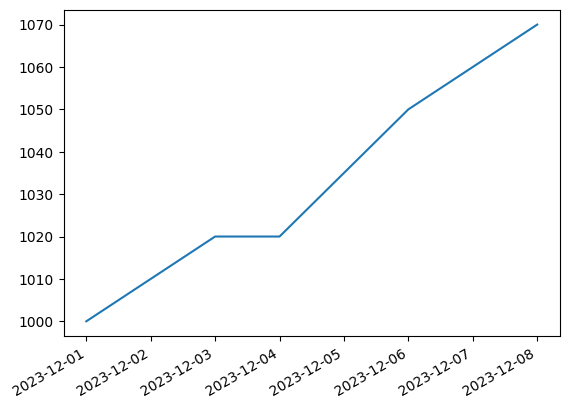

In [55]:
df2['A전자'].plot()

<Axes: >

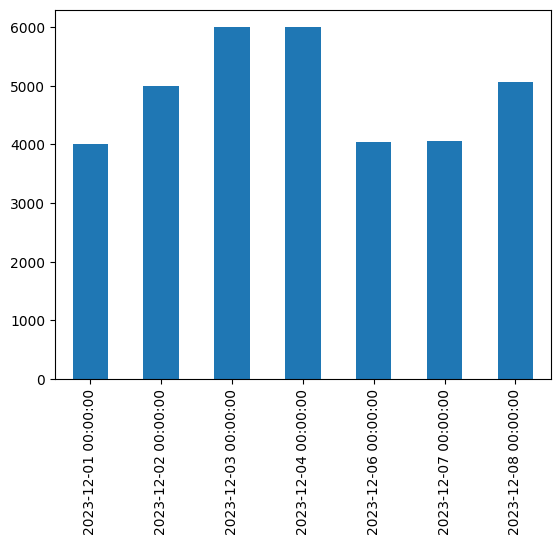

In [56]:
df2['D엔터'].plot(kind='bar')

<Axes: >

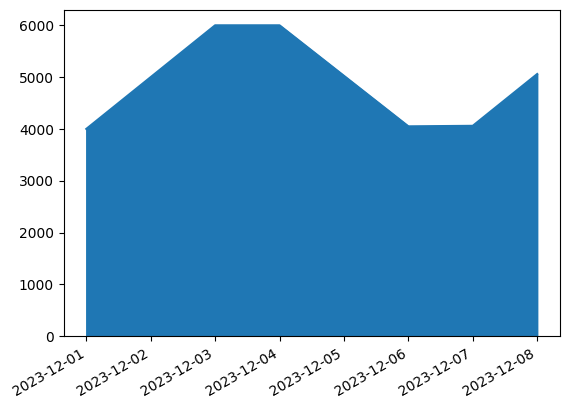

In [57]:
df2['D엔터'].plot(kind='area')